In [6]:

fig = plt.figure()
plt.plot(np.log(np.abs(z_left)),np.log(rho_left), "r-", label = "$z \\in [-L/2,0]$")
plt.plot(np.log(np.abs(z_right)),np.log(rho_right), 'b-', label = "$z \\in [0,L/2]$")
plt.legend()
plt.xlabel("$log|z|$")
plt.ylabel("$log|\\rho|$")
plt.show()

plt.plot(np.log(-z_left[::-1]),np.log(rho_avgd))
plt.legend()
plt.xlabel("$log|z|$")
plt.ylabel("$log|\\rho|$")
plt.show()



#ADDITIONAL:
#Calculate potential 
phi = GF.fourier_potentialV2(rho,L)
#Calculate Acceleration Field on Mesh:
a_grid = NB.acceleration(phi,L) 



NameError: name 'z_left' is not defined

<Figure size 432x288 with 0 Axes>

0.24124124124124124


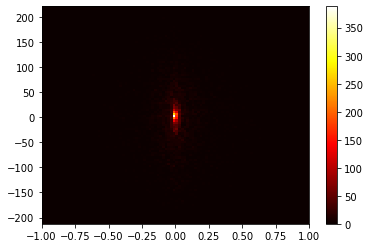

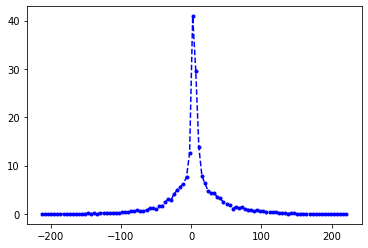

In [7]:
#hist, xedges, yedges = np.histogram2d(stars_x,stars_v,bins = [50,50])
#plt.imshow(hist,extent = (x_min,x_max,v_min,v_max), cmap = cm.hot, aspect = (x_max-x_min)/(v_max-v_min))
#plt.show()

#Re-center the system
z = np.linspace(-L/2,L/2,N)
max_index = 620
print(z[max_index])
stars_x_new = stars_x - z[max_index] #centroid_z

nbins = 100
hist, xedges, yedges, image = plt.hist2d(stars_x_new, stars_v, 
                            bins = [nbins,nbins], 
                            range = [[-L/2, L/2],[np.min(stars_v),np.max(stars_v)]],
                            #cmax = 250,
                            cmap = cm.hot)
plt.colorbar()
plt.show()

# print(hist)
# for i in range(len(hist)):
#     for j in range(len(hist)):
#         hist[i,j] = int(hist[i,j])
# print(hist)

def Abel(x_range: tuple, v_range: tuple,f):
    # f is a 2d-array. (A 2d histogram)

    x_min,x_max = x_range
    #v_min,v_max = v_range
    
    n_rows,n_cols = np.shape(f)

    #v_s = np.linspace(v_min,v_max,n_rows)
    x_s = np.linspace(x_min,x_max,n_cols)

    #dv = v_s[1]-v_s[0]
    dx = x_s[1]-x_s[0]

    holder = np.array([])
    for i in range(n_rows):
        #v = v_s[i]
        sum = 0
        for j in range(n_cols):
            #x = dx*j #x_s[j]. Note we only add up from x=0 to x->inf
            sum+= f[i][j]*dx
            
            # r = np.sqrt(v**2+x**2)
            # dr = np.sqrt(dv**2+dx**2)
            #
            # term1 = f[i][j]*r
            # term2 = np.sqrt(r**2-v**2)
            # sum+=dr*term1/term2
        holder = np.append(holder,sum)#2*sum)
    return holder

np.savetxt("hist.csv",hist,fmt ='%i',delimiter = ",")
hist = np.loadtxt("hist.csv",dtype = int,delimiter = ',')
v_min,v_max = np.min(stars_v),np.max(stars_v)
abel_transform = Abel((-L/2,L/2),(v_min,v_max),hist)

#print(abel_transform)
v_array = np.linspace(v_min,v_max,len(abel_transform))
plt.plot(v_array,abel_transform,'b--',marker = '.')
plt.show() 


/home/boris/Documents/Research/Coding/1D_Codes/Non-Dim/Analysis
----------New Analysis--------
r = 1 mu = 1 Num_bosons = 0 sigma = 0.001 Num_stars = 1000


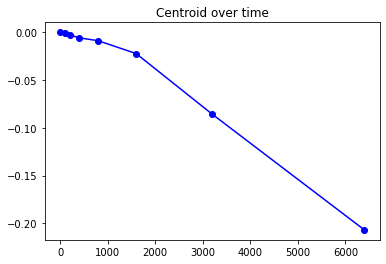

/home/boris/Documents/Research/Coding/OneD/WaveNonDim.py:129: RuntimeWarning: invalid value encountered in true_divide
  F_s = F_s/Norm_const


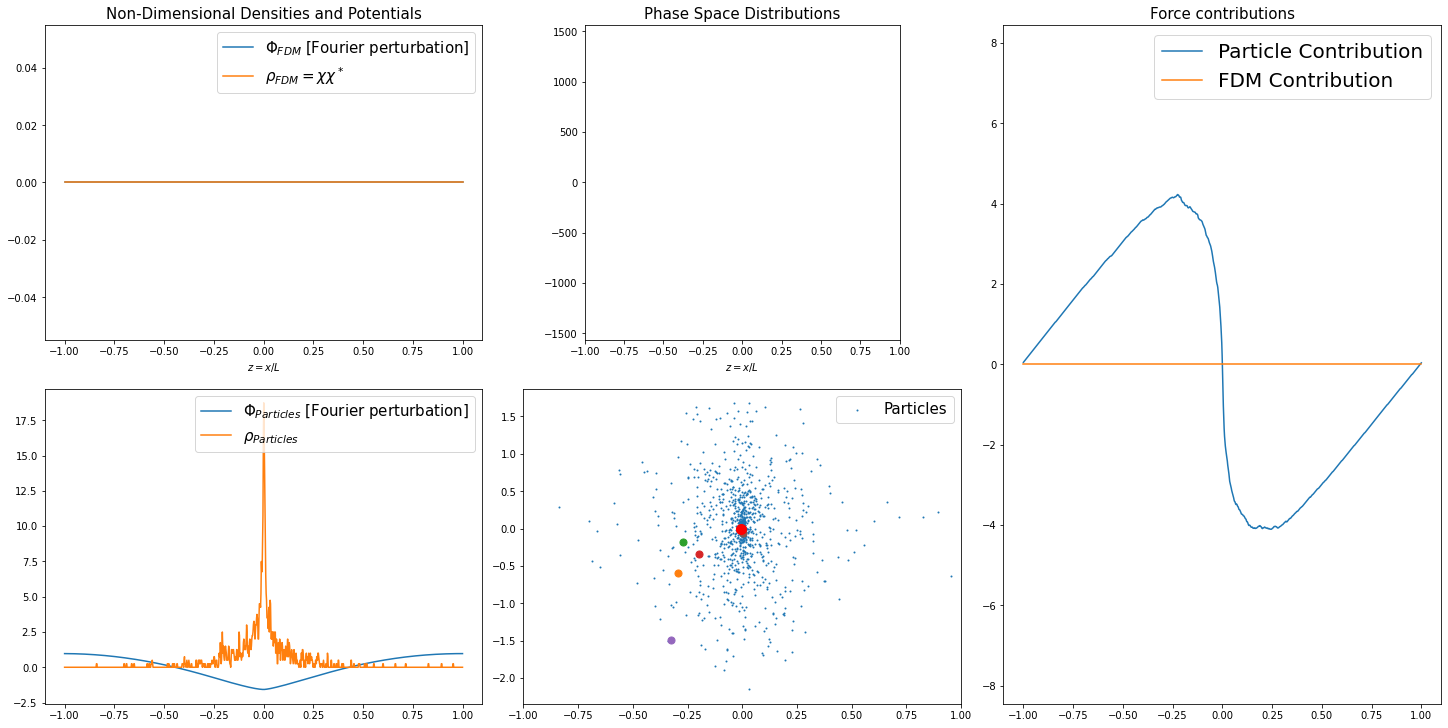

v_rms = 0.5923277051957598
z_rms = 0.15871675883738892
K_avg = 0.5*m*v_rms^2 = 0.1754260551712375 (m=1)
=> 2*K_avg = 0.350852110342475
W_avg = 158.7167588373889
------------------
K_tot = 0.17542605517123733
0.00017542605517123733
W_tot = -0.14596981745731766
-0.00014596981745731765


/home/boris/Documents/Research/Coding/1D_Codes/Non-Dim/Analysis/Analysis.py:267: RuntimeWarning: invalid value encountered in true_divide
  v_rms_array = bins/bins_counts


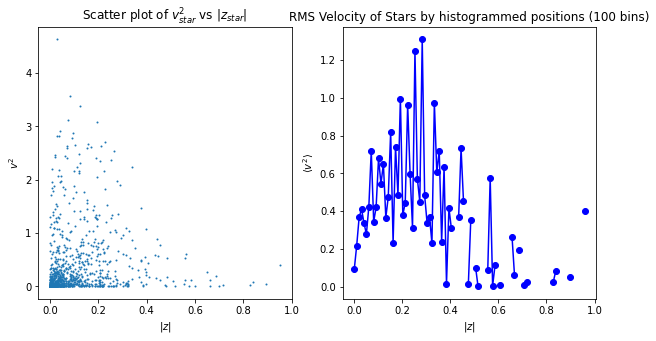

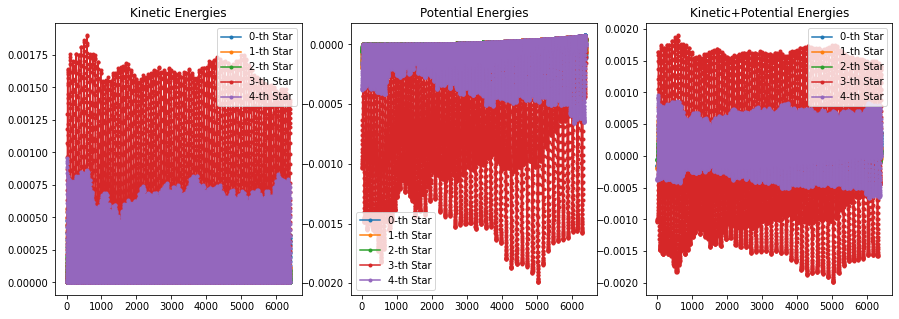

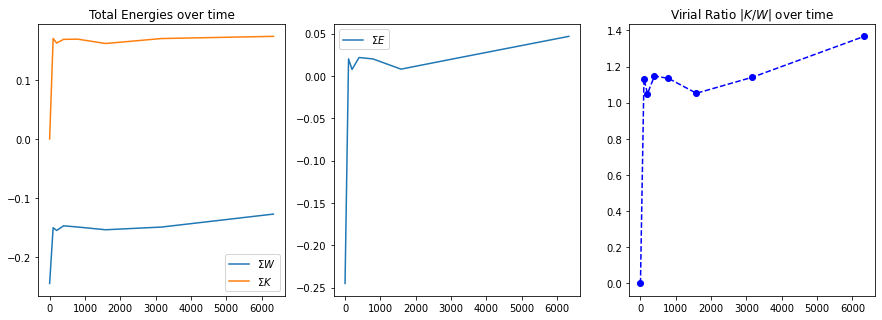

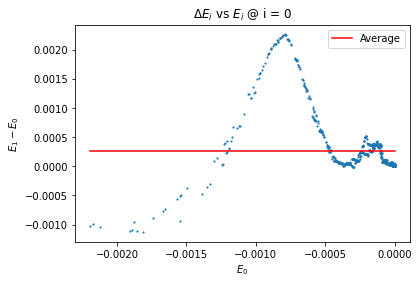

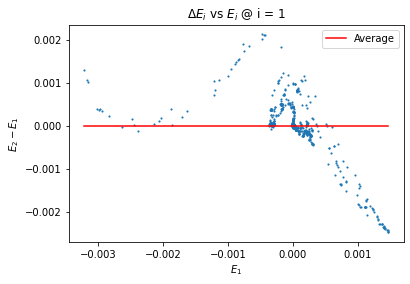

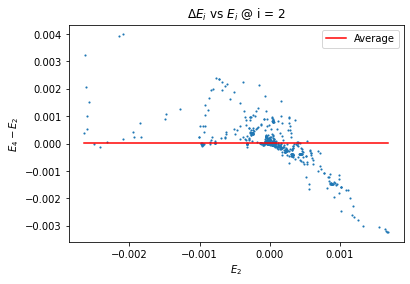

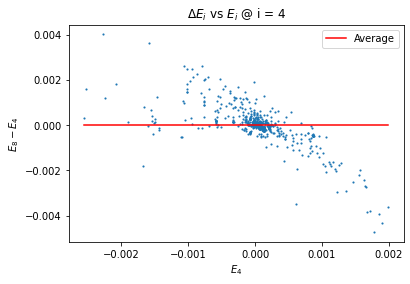

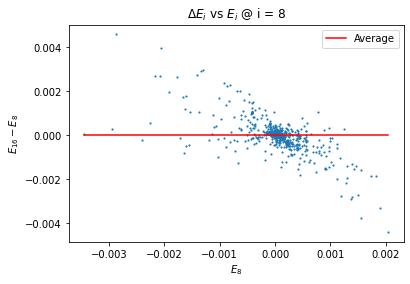

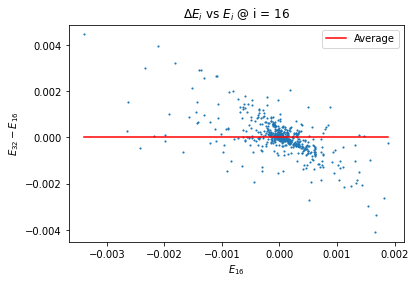

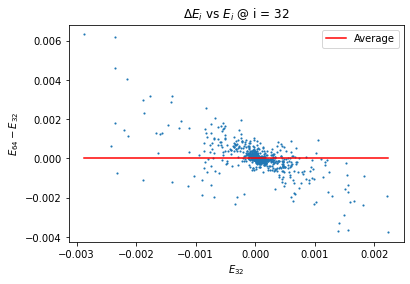

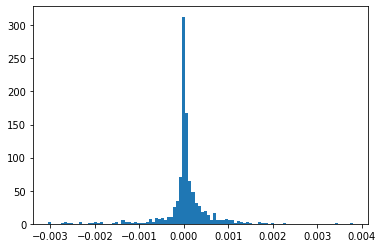

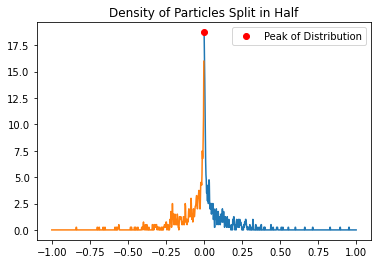

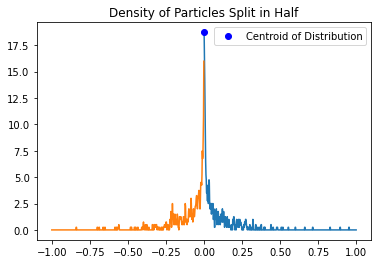

/home/boris/Documents/Research/Coding/1D_Codes/Non-Dim/Analysis/Analysis.py:443: RuntimeWarning: divide by zero encountered in log
  ax[1].plot(np.log(z_right),np.log(rho_whole))


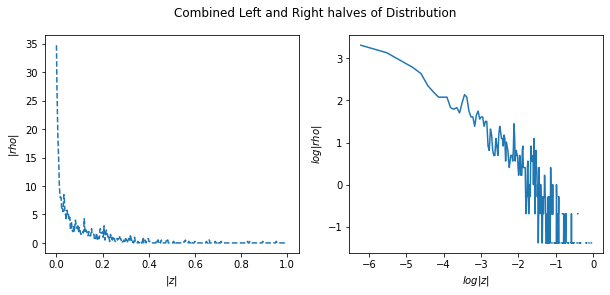

Check
Check
Check


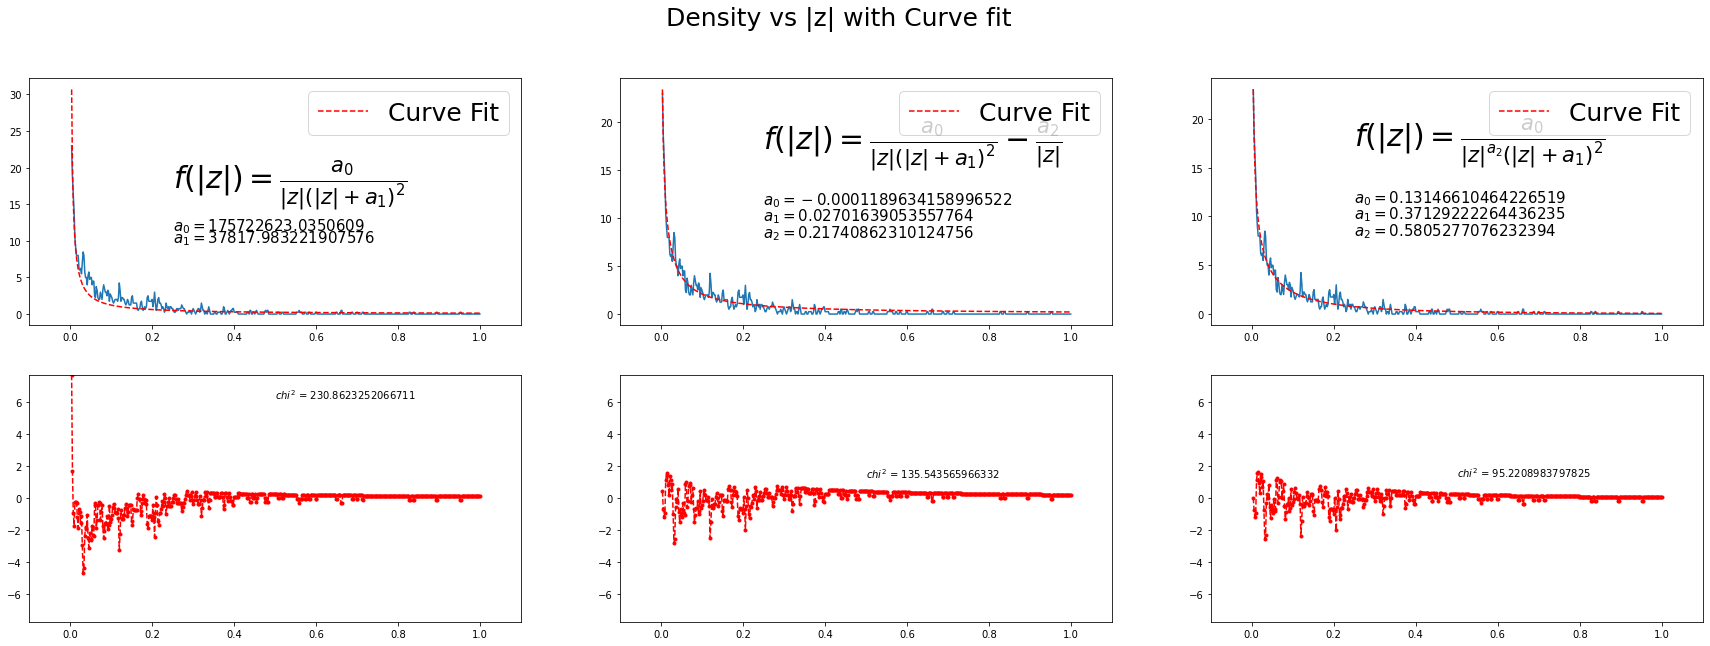

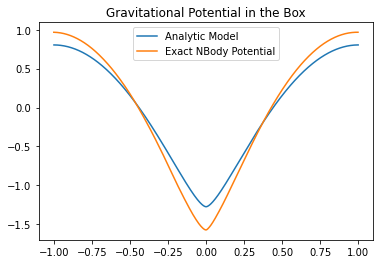

----------New Analysis--------
r = 1 mu = 1 Num_bosons = 0 sigma = 0.0002 Num_stars = 5000


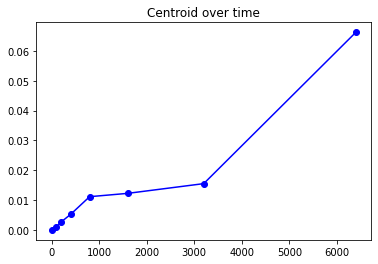

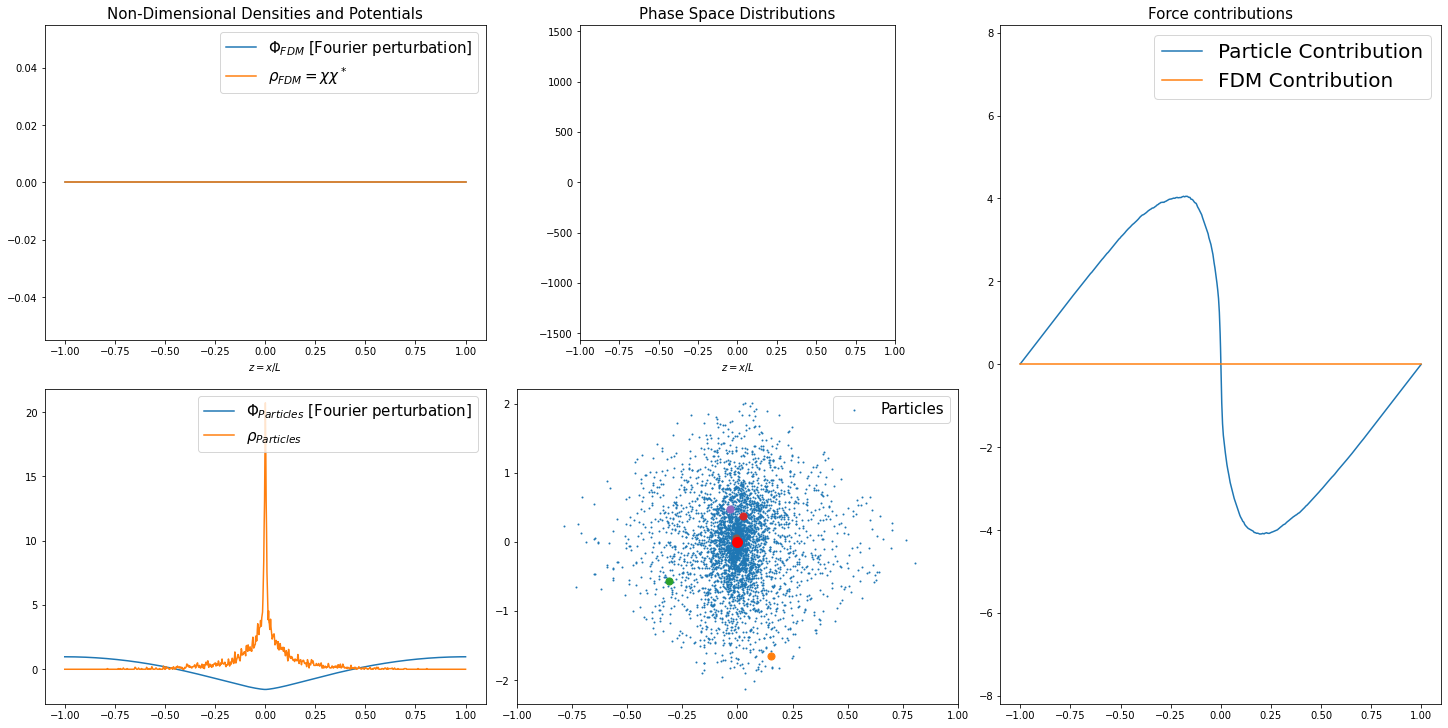

v_rms = 0.5851737606787921
z_rms = 0.1541549084183391
K_avg = 0.5*m*v_rms^2 = 0.17121416509348014 (m=1)
=> 2*K_avg = 0.3424283301869603
W_avg = 770.7745420916955
------------------
K_tot = 0.1712141650934794
3.424283301869588e-05
W_tot = -0.14558193639607853
-2.9116387279215706e-05


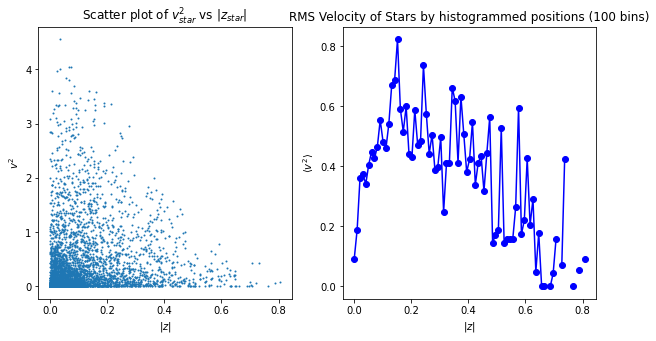

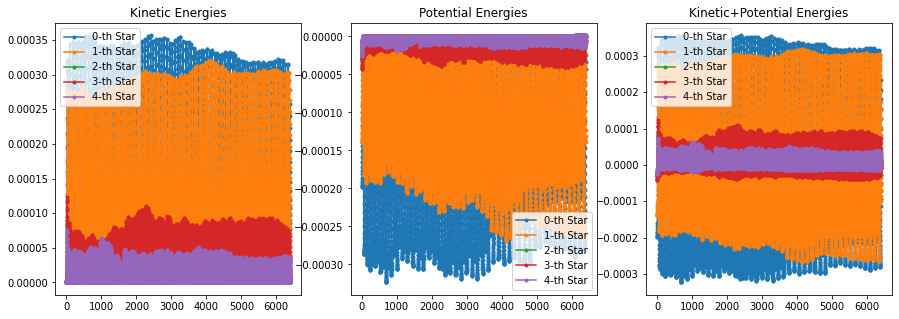

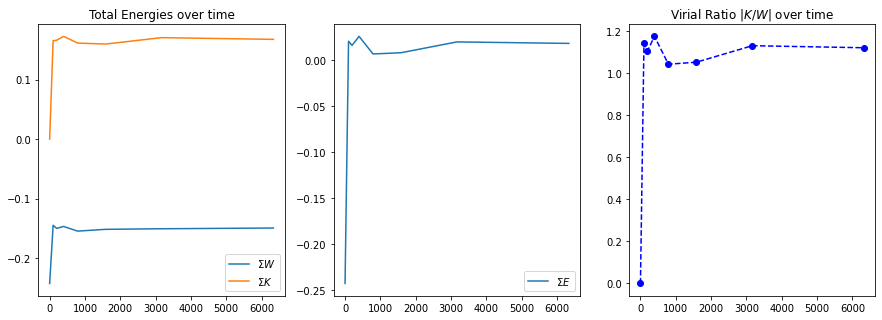

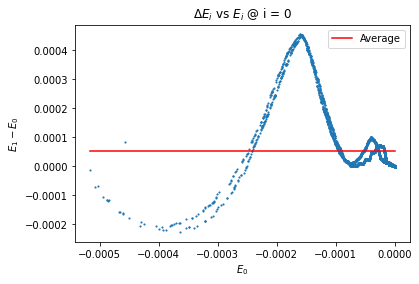

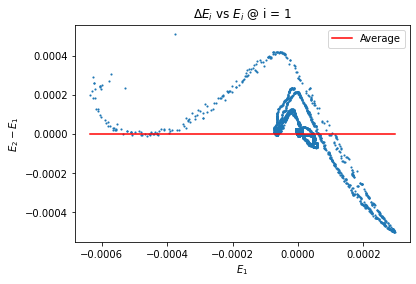

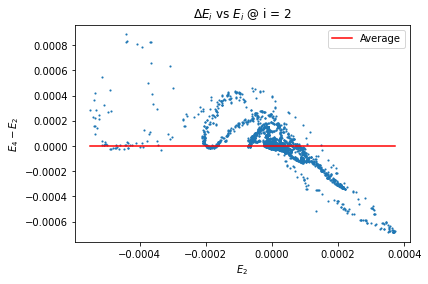

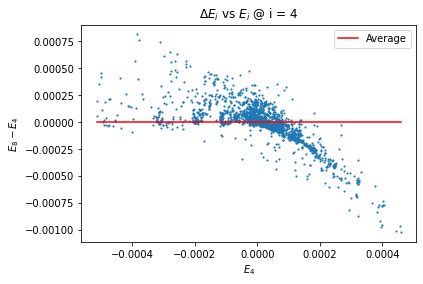

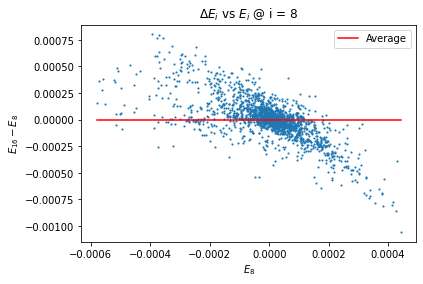

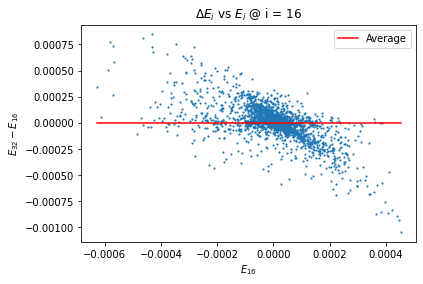

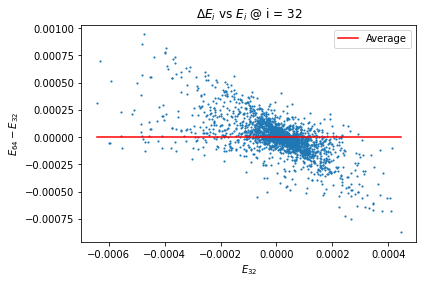

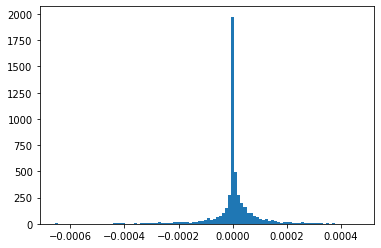

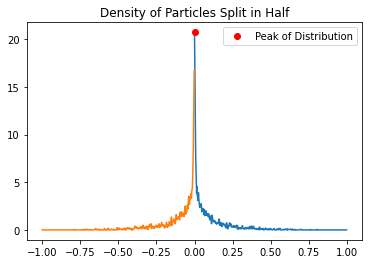

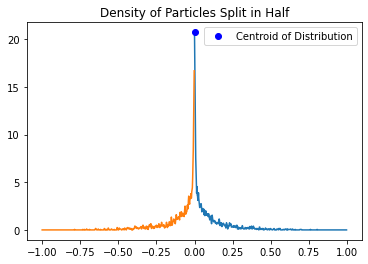

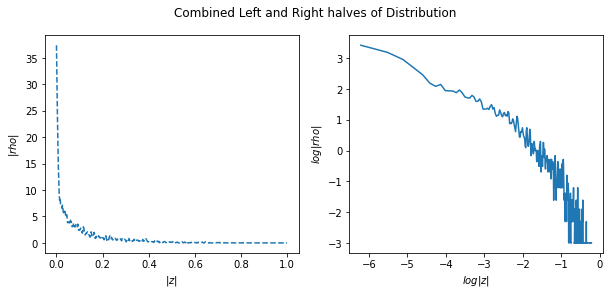

Check
Check
Check


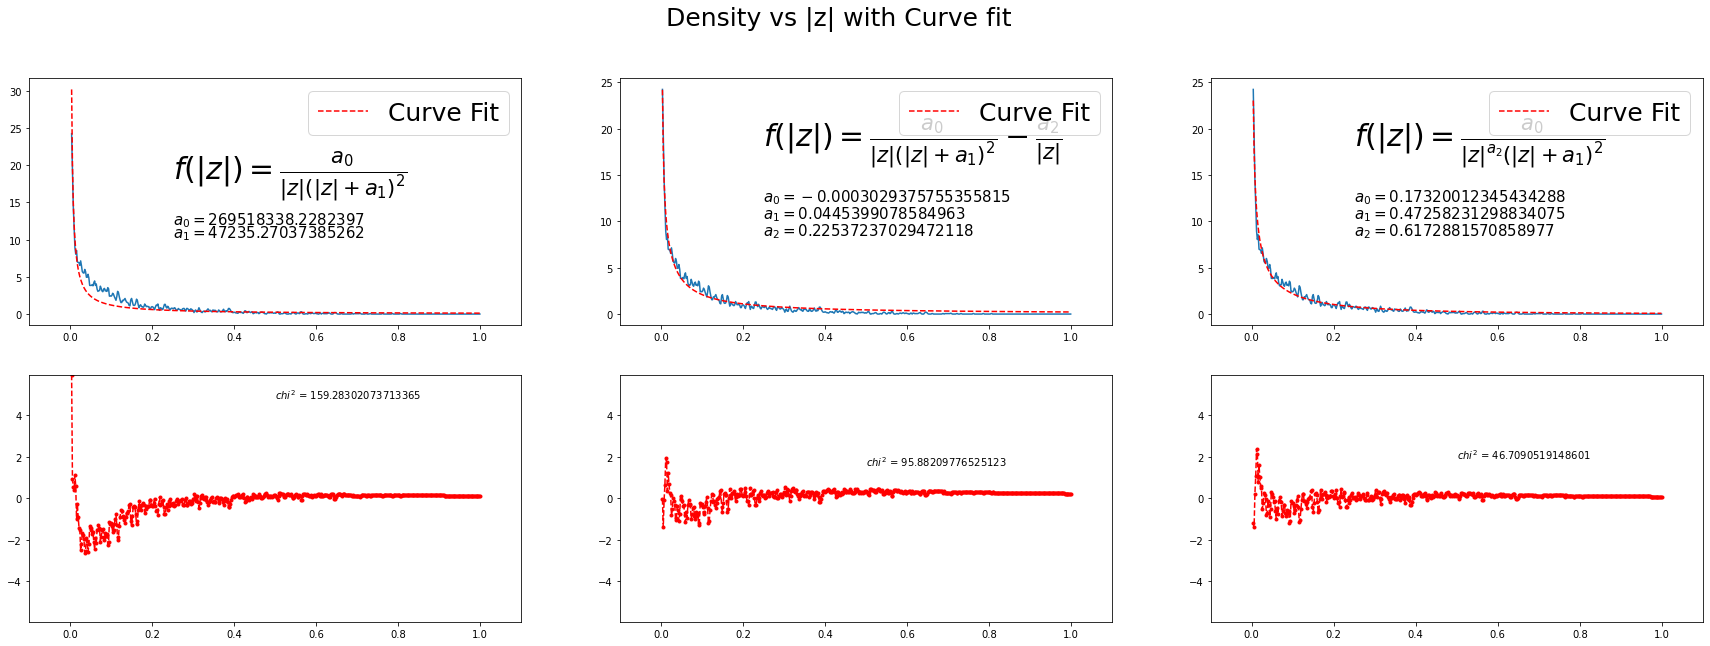

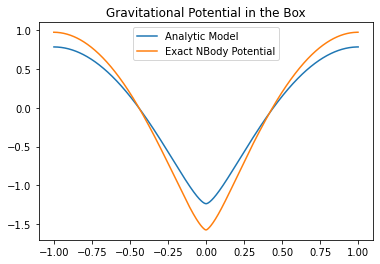

----------New Analysis--------
r = 1 mu = 1 Num_bosons = 0 sigma = 0.0001 Num_stars = 10000


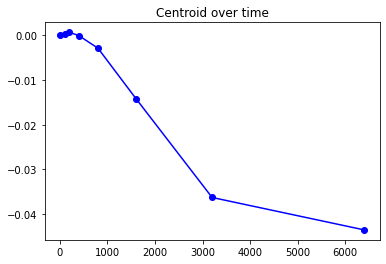

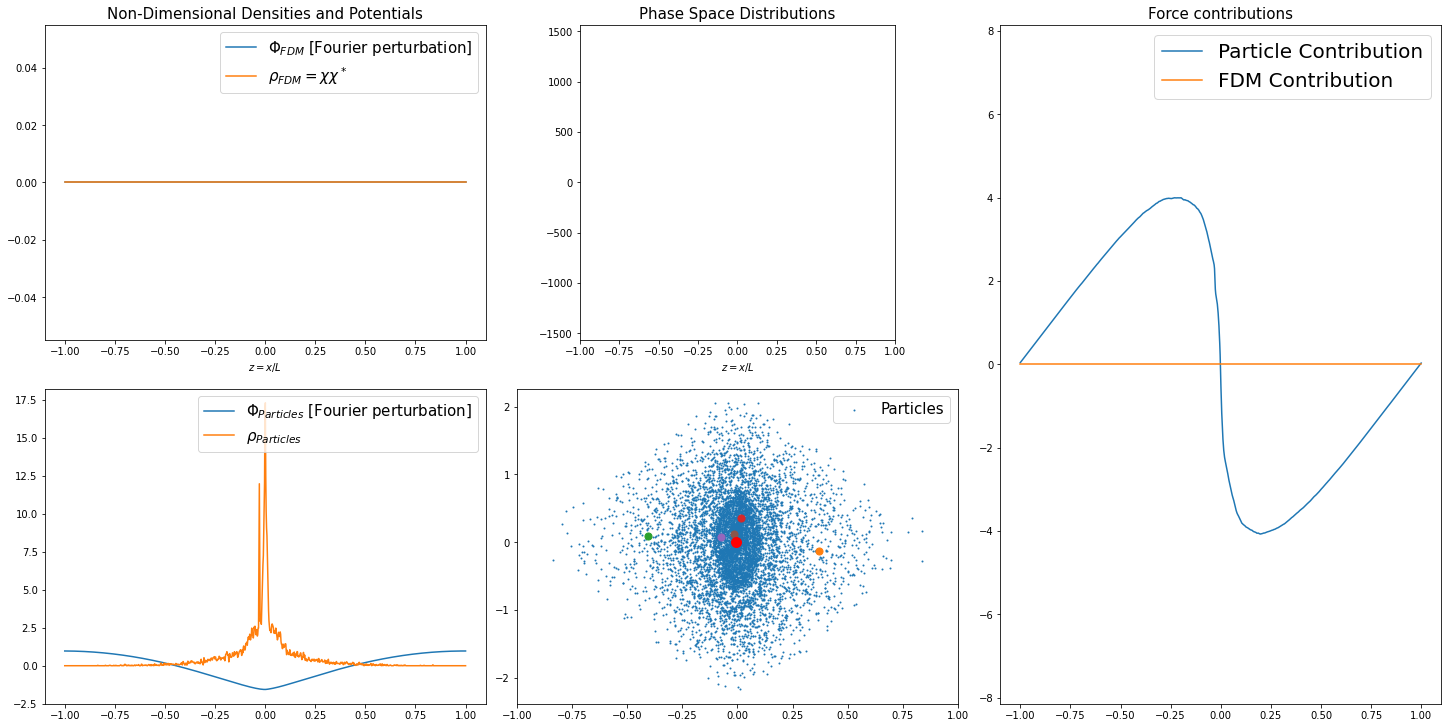

v_rms = 0.581649317774426
z_rms = 0.15731951911022882
K_avg = 0.5*m*v_rms^2 = 0.16915796443372758 (m=1)
=> 2*K_avg = 0.33831592886745515
W_avg = 1573.1951911022882
------------------
K_tot = 0.1691579644337266
1.691579644337266e-05
W_tot = -0.15082252821733694
-1.5082252821733694e-05


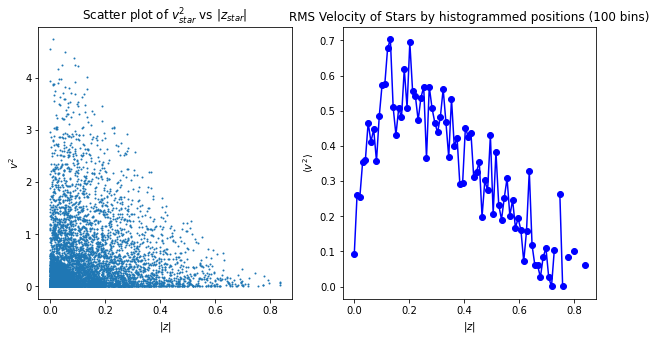

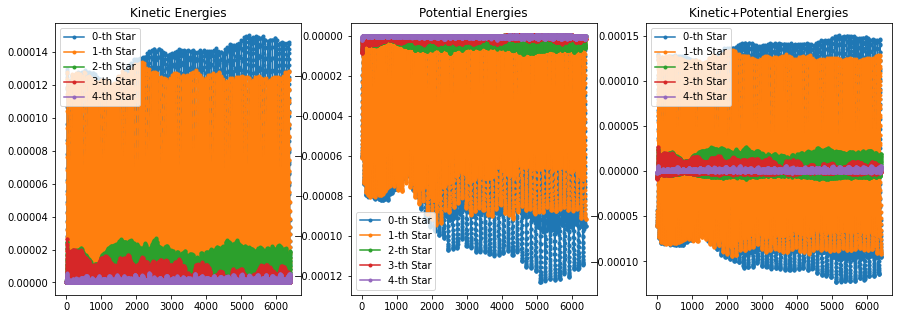

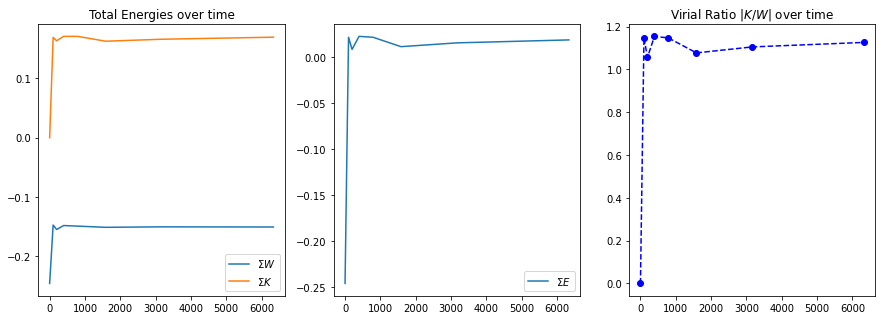

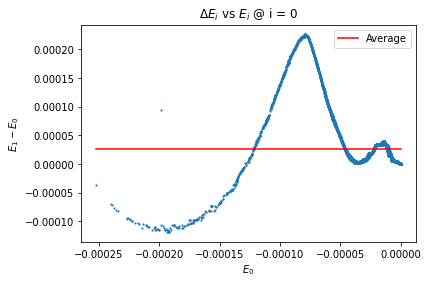

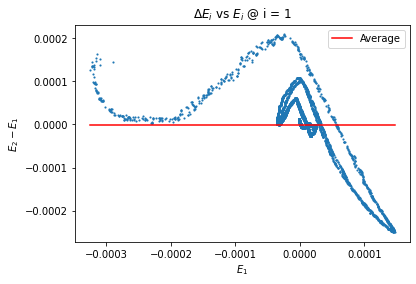

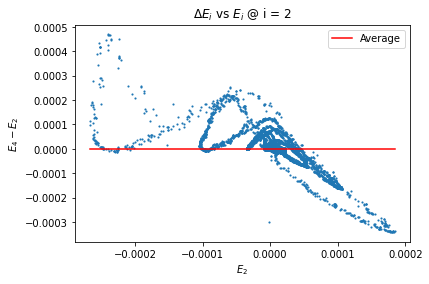

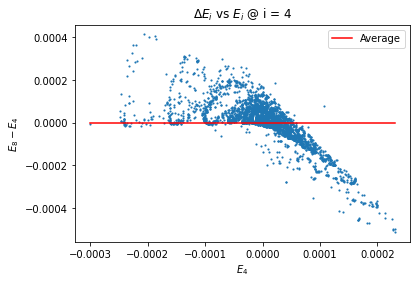

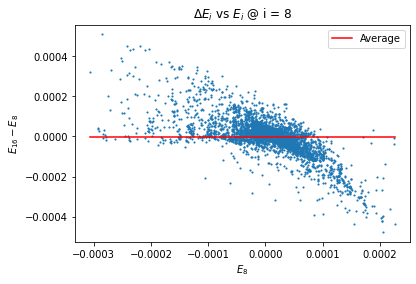

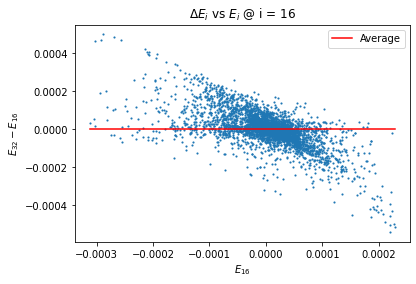

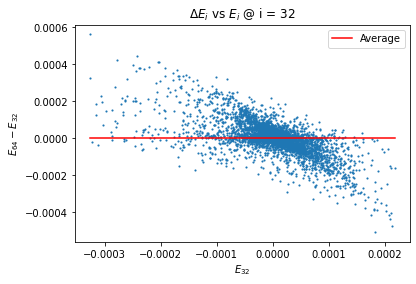

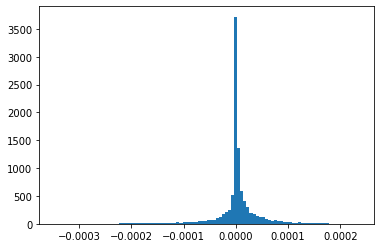

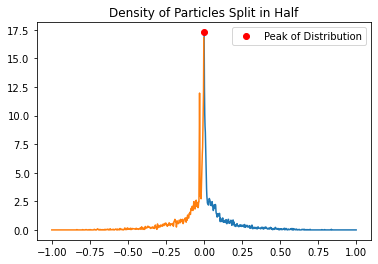

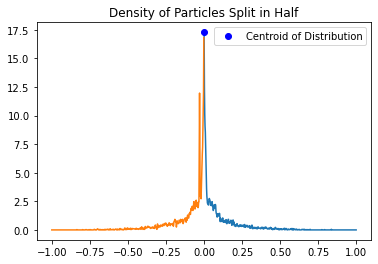

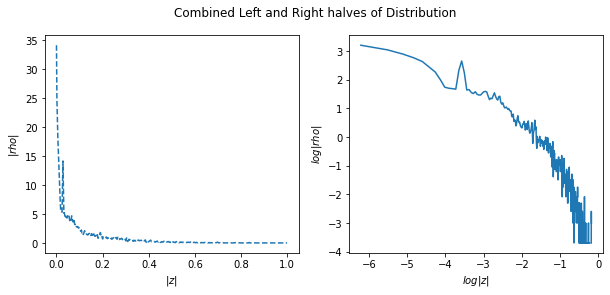

Check
Check
Check


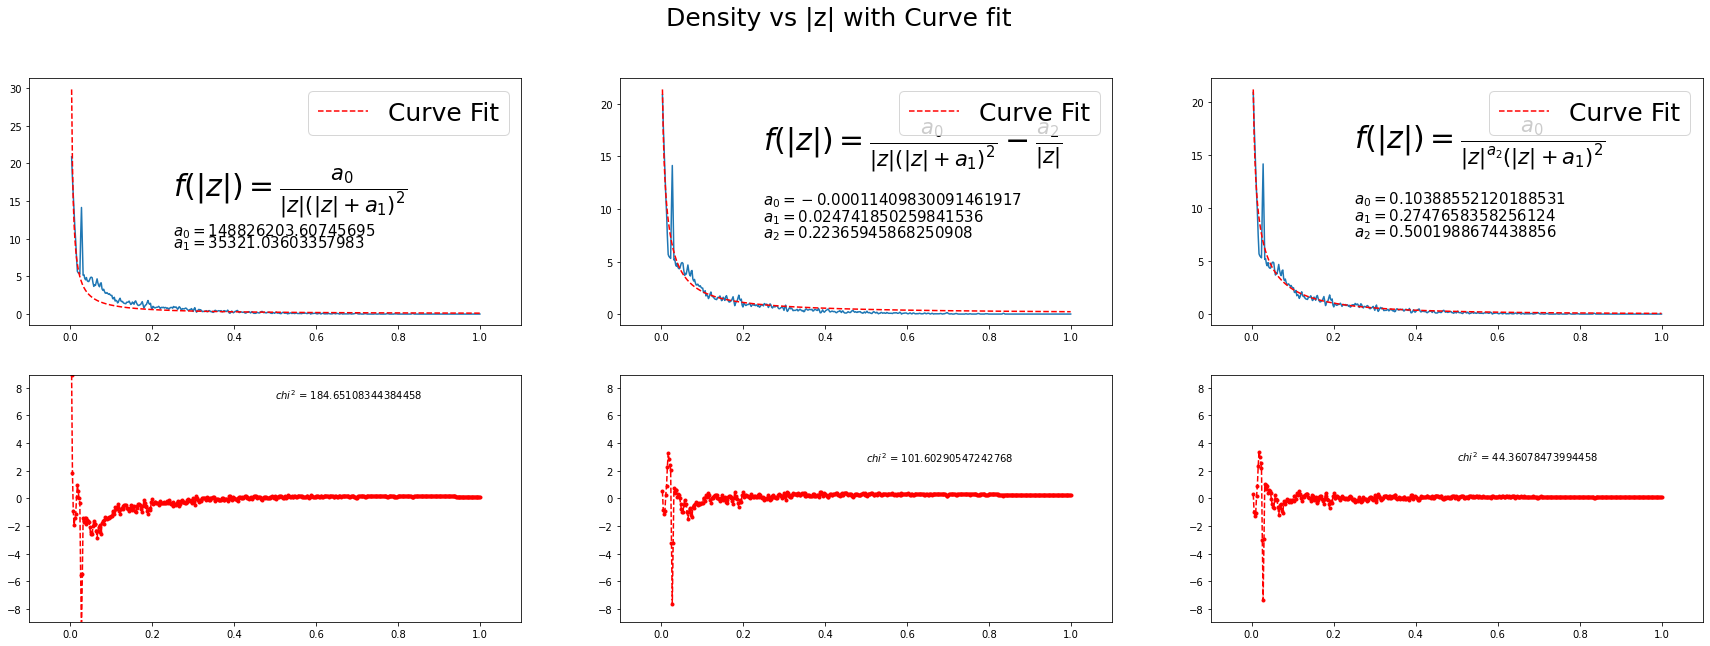

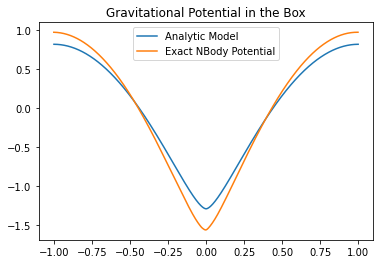

In [1]:
import Analysis 

#[ ..., [r,m,Num_bosons,sigma,Num_stars],...]
# Args = [
#     [0.5,1.0,0,1,10000],
#     [0.5,1.0,10000,1,10000],
#     [1,0.5,20000,1,10000],
#     [5,0.1,100000,1,10000],
#     [10,0.05,200000,1,10000],
#     [50,0.01,1000000,1,10000],
#     [0.5,1.0,10000,1,0]
# ]

Args = [
    [1,1,0,0.001,1000],
    [1,1,0,0.0002,5000],
    [1,1,0,0.0001,10000],
]

for args in Args:
    print("----------New Analysis--------")
    print(
        f"r = {args[0]}",
        f"mu = {args[1]}",
        f"Num_bosons = {args[2]}",
        f"sigma = {args[3]}",
        f"Num_stars = {args[4]}"
    )
    Analysis.analysis(*args)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

My_Package_PATH = "/home/boris/Documents/Research/Coding"
import sys
sys.path.insert(1, My_Package_PATH)
import OneD.NBody as NB

z = np.linspace(-1,1)

x = 0
v = 1
star = NB.star(0,1,x,v)

dt = 0.1
t = 0
i = 0
while t < 2:
    plt.plot(star.x,0,'ro')
    plt.xlim(-1,1)
    plt.show()

    star.x -= v*dt
    star.reposition(2)
    t += dt

KeyboardInterrupt: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import os
import subprocess
import cv2 
from PIL import Image 
import scipy.optimize as opt

#Import My Library
My_Package_PATH = "/home/boris/Documents/Research/Coding"
import sys
sys.path.insert(1, My_Package_PATH)
import OneD.WaveNonDim as ND
import OneD.NBody as NB
import OneD.GlobalFuncs as GF

#Set up Directory for saving files/images/videos
# Will not rename this again
dirExtension = "1D_Codes/Non-Dim/Analysis"
Directory = os.getcwd()#+"/"+dirExtension #os.curdir() #"/home/boris/Documents/Research/Coding/1D codes/Non-Dim"
print(Directory)

r,m,Num_bosons,sigma,Num_stars = [0.5,1.0,0,1,10000]

mu = m #M_scale = 1

L = 2
N = 10**3
z = np.linspace(-L/2,L/2,N)
dz = z[1]-z[0]

folder = "ParticlesOnly_Snapshots"
stars_x = np.loadtxt(folder+"/"+f"StarsOnly_Pos.csv", dtype = float, delimiter=",")
stars_v = np.loadtxt(folder+"/"+f"StarsOnly_Vel.csv", dtype = float, delimiter=",")
Energies = np.loadtxt(folder+"/"+"Energies.csv", dtype = float,delimiter = ",")
#chi = np.loadtxt(folder+"/"+f"Chi.csv", dtype = complex, delimiter=",")
chi = np.zeros_like(z)
centroids = np.loadtxt(folder+"/"+"Centroids.csv",dtype = float, delimiter=',')

stars = [NB.star(i,sigma,stars_x[i],stars_v[i]) for i in range(len(stars_x))]

grid_counts = NB.grid_count(stars,L,z)

rho = (grid_counts/dz)*sigma 


i = 0
max_bool = False
while max_bool == False:
    for j in range(len(rho)):
        if rho[j] > rho[i]: #if you come across an index j that points to a larger value..
            #then set i equal to j
            i = j 
            #break
        else:
            max_index = i
            max_bool = True
max_rho = rho[max_index]

#Other method to accumulate left and right sides:
for star in stars:
    star.x = star.x - z[max_index] #shift
    star.reposition(L) #reposition

grid_counts = NB.grid_count(stars,L,z)
rho_part = (grid_counts/dz)*sigma 
#Add the density from the FDM
rho_FDM = mu*np.absolute(chi)**2 
rho = rho_FDM + rho_part

centroid_z = 0
for j in range(len(grid_counts)):
    centroid_z += z[j]*grid_counts[j]
centroid_z = centroid_z / Num_stars

stars_x = [star.x for star in stars]

std = np.std(stars_v)
mean_x = np.mean(stars_x)


R = 0
while True:
    R += dz
    mass_enclosed = 0
    star_collection = []
    for star in stars:
        if np.abs(star.x-mean_x) <= R:
            mass_enclosed += 1
            star_collection.append(star)
    print(R,mass_enclosed)
    if mass_enclosed >= 0.5*Num_stars:
        break

print(R)
plt.figure()
plt.scatter(stars_x,stars_v,s=1)
xx = np.linspace(-R,R,100)
plt.plot(xx,np.sqrt(R-xx**2))
plt.plot(xx,-np.sqrt(R-xx**2))
plt.scatter([star.x for star in star_collection],[star.v for star in star_collection],s=1)
plt.show()

Sigma = std**2 / R
print(Sigma)

/home/boris/Documents/Research/Coding/1D_Codes/Non-Dim/Analysis


OSError: ParticlesOnly_Snapshots/Energies.csv not found.

In [3]:
G = 6.67E-11
print(R)
print("--------------------")
print("")

Sigma = std**2 / (np.pi* R**(3/2))
print(Sigma)

print(10000/R)
print(std**2)
print(10000/(np.pi*R**2))

print(std**2 * R)

print("--------------------")
print("")
new_std = np.std([star.v for star in star_collection])
Sigma = new_std**2 / (np.pi* R**(3/2))
print(f"Sigma = {Sigma}" )

print(10000/R)
print(new_std**2)
print(10000/(np.pi*R**2))

print(new_std**2 * R)


0.048048048048046965
--------------------

100502.33917739333
208125.0000000047
3325.3676414862753
1378791.600352967
159.77742421555317
--------------------

Sigma = 61907.311466298816
208125.0000000047
2048.3560084912815
1378791.600352967
98.41950791549479


In [4]:
v_rms = np.sqrt(np.mean([star.v**2 for star in stars]))
print(v_rms)

57.66620191650019


In [5]:
v_mean = np.mean([star.v for star in stars])
std = np.sqrt(np.sum([(star.v - v_mean)**2 for star in stars])/(len(stars)-1))
print(std)

Sigma = std**2 / (np.pi* R**(3/2))
print(Sigma)

print(10000/R)
print(std**2)
print(10000/(np.pi*R**2))

print(std**2 * R)


57.66888425752163
100512.39041643498
208125.0000000047
3325.7002115074265
1378791.600352967
159.79340355590878


In [6]:
phi_part = GF.fourier_potentialV2(rho_part,L)
phi_part = phi_part - np.mean(phi_part)
print(np.mean(phi_part))

phi_part = phi_part - np.max(phi_part)

# Compute Chandrasekhar's potential energy tensor:
a_part = NB.acceleration(phi_part,L)
W = 0
for i in range(len(z)):
    dW = rho_part[i]*z[i]*a_part[i]
    W += dW
print(W)

a_part = NB.acceleration(phi_part,L)
W = 0
for i in range(len(z)):
    dW = -0.5*rho_part[i]*phi_part[i]
    W += dW
print(W)

# Compute only for the stars that exist:
a_part = NB.acceleration(phi_part,L)
W = 0
for star in stars:
    g = NB.g(star,a_part,dz)

    dW = - star.x*g
    W += dW / Num_stars
print(W)

# phi_part = GF.fourier_potentialV2(rho_part,L)
# a_part = NB.acceleration(phi_part,L)
# W = 0
# for i in range(len(z)):
#     dW = - dz*a_part[i]**2 / (8*np.pi)
#     W += dW
# print(W)
#W = np.sum(phi_part)
#print(W)

# Compute only for the stars that exist:
W = 0
for star in stars:
    #g = NB.g(star,a_part,dz)
    i = int(star.x//dz)
    rem = star.x % dz 

    if i != len(phi_part)-1:
        value = phi_part[i] + rem*(phi_part[i+1]-phi_part[i])/dz
    elif i == len(phi_part)-1:
        # then i+1 <=> 0
        value = phi_part[i] + rem*(phi_part[0]-phi_part[i])/dz
    
    phi_star = value
    dW = phi_star
    W += dW
print(W)


0.0
-16785655529.943058
55851483242.48459
-1500.1026550328993
-7621006.55368937


# Compute Total KE and Total Potential Energy of Stars

In [17]:
# Compute total KE of stars:
K = 0
for star in stars:
    dK = 0.5*sigma*star.v**2
    K += dK
print(K)
#average KE:
print(K/Num_stars)

# #Compute Total Potential
# W = 0
# for star in stars:
#     #g = NB.g(star,a_part,dz)
#     i = int(star.x//dz)
#     rem = star.x % dz 

#     if i != len(phi_part)-1:
#         value = phi_part[i] + rem*(phi_part[i+1]-phi_part[i])/dz
#     elif i == len(phi_part)-1:
#         # then i+1 <=> 0
#         value = phi_part[i] + rem*(phi_part[0]-phi_part[i])/dz
    
#     phi_star = value
#     dW = phi_star
#     W += dW
# print(W)
# #average W:
# print(W/Num_stars)

# Compute only for the stars that exist:
a_part = NB.acceleration(phi_part,L)
W = 0
for star in stars:
    g = NB.g(star,a_part,dz)

    dW = - sigma*star.x*g
    W += dW
print(W)
print(W/Num_stars)

16626954.217372933
1662.6954217372934
-15001026.55032902
-1500.102655032902


# Calculate $v_{rms}$ and $R_{syst}$ 

Want to verify
$$\langle v^2 \rangle = \frac{GM}{R_{syst}}$$

In [35]:
v_rms = np.sqrt(np.mean([star.v**2 for star in stars]))
z_rms = np.sqrt(np.mean([star.x**2 for star in stars]))
print(f"v_rms = {v_rms}")
print(z_rms)
#v_rms = np.sqrt(np.sum([star.v**2 for star in stars])/Num_stars)

K = 0.5 * v_rms**2
print(f"K_avg = 0.5*m*v_rms^2 = {K} (m=1)")
print(F"=> 2*K_avg = {2*K}")

print(z_rms*Num_stars)

print("-----------------------")




R_syst = Num_stars / v_rms**2
print(R_syst)



rho_0 = np.mean(rho_part)
print(4*rho_0*z_rms)

print(v_rms**2 / (2*np.pi*z_rms))

print(16*np.pi*rho_0**2*z_rms**3 / Num_stars)


v_rms = 57.66620191650019
0.1567842541769929
K_avg = 0.5*m*v_rms^2 = 1662.6954217372852 (m=1)
=> 2*K_avg = 3325.3908434745704
1567.842541769929
-----------------------
3.0071653140030277
3132.549398456389
3375.673107160588
483.3349205244898


(-126523.1647523825, 25304.632950476498)

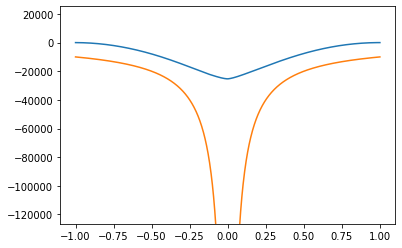

In [34]:
plt.plot(z,phi_part)
plt.plot(z,-Num_stars/np.abs(z))
plt.ylim(5*np.min(phi_part),-np.min(phi_part))

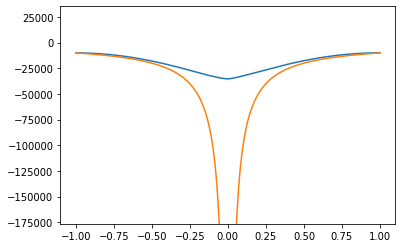

16626954.217372933
1662.6954217372934
-107621006.55368945
-10762.100655368946


In [87]:

phi_part = phi_part - (np.max(phi_part)-np.max(-Num_stars/np.abs(z)))

plt.plot(z,phi_part)
plt.plot(z,-Num_stars/np.abs(z))
plt.ylim(5*np.min(phi_part),-np.min(phi_part))
plt.show()

# Compute total KE of stars:
K = 0
for star in stars:
    dK = 0.5*star.v**2
    K += dK
print(K)
#average KE:
print(K/Num_stars)

#Compute Total Potential
W = 0
for star in stars:
    #g = NB.g(star,a_part,dz)
    i = int(star.x//dz)
    rem = star.x % dz 

    if i != len(phi_part)-1:
        value = phi_part[i] + rem*(phi_part[i+1]-phi_part[i])/dz
    elif i == len(phi_part)-1:
        # then i+1 <=> 0
        value = phi_part[i] + rem*(phi_part[0]-phi_part[i])/dz
    
    phi_star = value
    dW = phi_star
    W += dW
print(W)
#average W:
print(W/Num_stars)

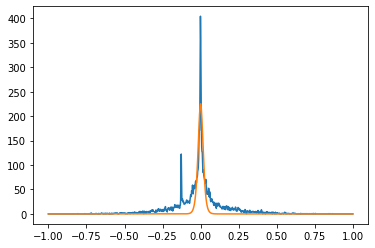

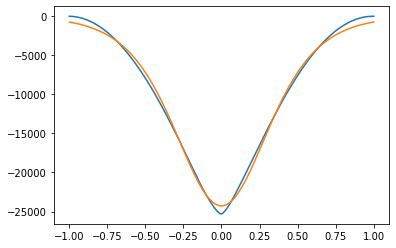

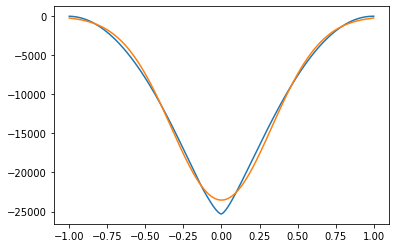

In [29]:
def f(z,*p):
    u_0 = p[0]
    z_0 = p[1]
    return u_0 / np.cosh(0.5*z/z_0)**2

guess = [rho_0,z_0]
popt,pcov = opt.curve_fit(f,z,grid_counts,p0 = guess)
plt.plot(z,grid_counts)
plt.plot(z,f(z,*popt))
plt.show()

guess = [rho_0,z_0]
popt,pcov = opt.curve_fit(f,z,phi_part,p0 = guess)
plt.plot(z,phi_part)
plt.plot(z,f(z,*popt))
plt.show()

def g(z,*p):
    return p[0]*np.exp(-z**2 / p[1])

guess = [-rho_0,z_0]
popt,pcov = opt.curve_fit(g,z,phi_part,p0 = guess)
plt.plot(z,phi_part)
plt.plot(z,g(z,*popt))
plt.show()

